In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data fields  
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

In [2]:
taxi = pd.read_csv('nyc-taxi-trip-duration/train/taxi_data.csv')
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
taxi2 = taxi[['passenger_count', 'trip_duration']]
taxi2.head()
taxi2.sort_values(by='trip_duration', ascending=False).head(10)

,passenger_count,trip_duration
295382,1,86391
73816,1,86390
59891,1,86387
753763,4,86379
91717,1,86378
66346,1,86377
172662,1,86369
779028,6,86369
483959,4,86366
344777,1,86364


In [4]:
taxi3 = taxi2.groupby('passenger_count').count().reset_index()
taxi3

,passenger_count,trip_duration
0,0,39
1,1,743129
2,2,151077
3,3,43033
4,4,20336
5,5,56252
6,6,34700
7,7,3
8,8,1
9,9,1


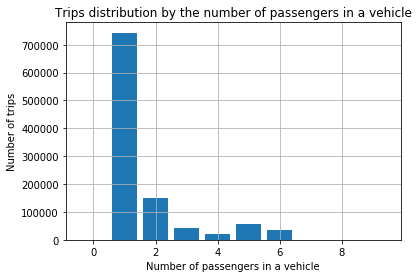

In [5]:
# 1
# Построим столбчатую диаграмму распределения поездок по количеству пассажиров в такси.
# При достаточно ограниченном количестве пассажиров такой тип диаграммы наглядно отображает картину.

plt.bar(taxi3['passenger_count'], taxi3['trip_duration'])
plt.xlabel('Number of passengers in a vehicle')
plt.ylabel('Number of trips')
plt.title('Trips distribution by the number of passengers in a vehicle')
plt.grid()

# Занятный факт: люди чаще ездят впятером, чем втроем.

C:\Users\gogol\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Number of trips')

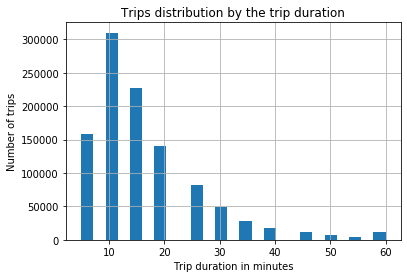

In [6]:
# 2
# Посмотрим гистограмму распределения длительности поездок в такси.
# Такой тип диаграммы хорошо подходит для быстрого понимания продолжительности поездки.

def classifier(time):
    """Classifies trips in minutes as '5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55' '60'"""
    if time/60 < 5:
        return 5
    elif time/60 < 10:
        return 10
    elif time/60 < 15:
        return 15
    elif time/60 < 20:
        return 20
    elif time/60 < 25:
        return 25
    elif time/60 < 30:
        return 30
    elif time/60 < 35:
        return 35
    elif time/60 < 40:
        return 40
    elif time/60 < 45:
        return 45
    elif time/60 < 50:
        return 50
    elif time/60 < 55:
        return 55
    else:
        return 60
    
taxi2['class'] = taxi2.trip_duration.apply(classifier)

ax = taxi2['class'].hist(bins=25)
ax.set_title('Trips distribution by the trip duration')
ax.set_xlabel('Trip duration in minutes')
ax.set_ylabel('Number of trips')

# Мы видим, например, что чаще всего поездка длится 5-10 минут.

C:\Users\gogol\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


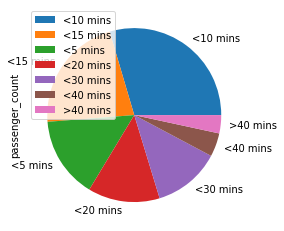

In [7]:
# 3
# Построим круговую диаграмму распределения длительности поездок в такси.
# В данном случае абсолютно точные данные не нужны, и круговая диаграмма легко представляет примерное соотношение.

def classifier2(time):
    """Classifies trips as '<15 mins', '<30 mins', '<45 mins', '<1 hour', '<1.5 hour', '<2 hours', '<3 hours', '>3 hours'"""
    if time/60 < 5:
        return '<5 mins'
    elif time/60 < 10:
        return '<10 mins'
    elif time/60 < 15:
        return '<15 mins'
    elif time/60 < 20:
        return '<20 mins'
    elif time/60 < 30:
        return '<30 mins'
    elif time/60 < 40:
        return '<40 mins'
    else:
        return '>40 mins'

taxi2['class'] = taxi2.trip_duration.apply(classifier2)

taxi4 = taxi2.groupby(['class']).count().sort_values(by='passenger_count', ascending=False)

taxi4.plot(kind='pie', y='passenger_count')

# Удивительно для Нью-Йорка с его пробками, но доля поездок, длящихся более 40 минут, оказалась чрезвычайно мала.

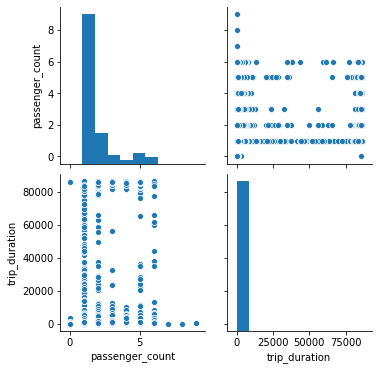

In [8]:
# 4
# Построим график типа pair plot (scatter plot matrix), чтобы узнать,
# как связаны (и связаны ли вообще) между собой длительность поездки и количество паасажиров.

taxi_plot = sns.pairplot(taxi[['passenger_count', 'trip_duration']])
taxi_plot

# Можно заметить, что, например, при 3 и 4 пассажирах поездка по какой-то причине либо короткая, либо очень длинная.
# Средние значения по длительности практически отсутствуют, что не свойственно поездкам с другим количеством пассажиров.

In [9]:
import re
def define_hour(time):
    return int(re.sub(r'\d{4}-\d{2}-\d{2}\s(\d{2}):(\d{2}):(\d{2})', r'\1', time))

taxi['hour'] = taxi.pickup_datetime.apply(define_hour)

taxi5 = taxi.groupby(['hour'])[['trip_duration']].mean()
taxi5

,trip_duration
hour,
0,891.435005
1,902.364053
2,902.275377
3,890.267216
4,913.887400
5,810.184638
6,717.626449
7,825.799140
8,934.163980


In [10]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [11]:
# 5
# Построим график c помощью Plotly, чтобы посмотреть, как зависит продолжительность поездки от времени суток.
# Наиболее подходящей визуализацией будет интерактивный график с часами по оси х и с продолжительностью поездки по оси у.

trace0 = go.Scatter(
    x=taxi5.index,
    y=taxi5.trip_duration,
    name='Trip duration'
)

data = [trace0]
layout = {'title': 'Trip duration distribution by hours'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

# Оказывается, в Нью-Йорке наиболее длительные поездки на такси приходятся на 15 часов, а не на часы пик.